## Implement of a curvature

Here we compute the transport map $\mathbf{O}_{ij}:= \mathscr{F}^T_{v \unlhd e}\mathscr{F}_{u \unlhd e}$ according to  https://arxiv.org/pdf/2206.08702.pdf and https://arxiv.org/pdf/1102.0075.pdf

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
import pandas as pd
from scipy.stats import pearsonr

In [2]:
ellipsoid = np.array(pd.read_csv('ellipsoid_9-15-9.csv', sep=',', header=None))
cur1 = np.array(pd.read_csv('ellipsoid_cur_1.csv', sep=',', header=None))
cur2 = np.array(pd.read_csv('ellipsoid_cur_2.csv', sep=',', header=None))
cur3 = np.array(pd.read_csv('ellipsoid_cur_3.csv', sep=',', header=None))
cur4 = np.array(pd.read_csv('ellipsoid_cur_4.csv', sep=',', header=None))
cur5 = np.array(pd.read_csv('ellipsoid_cur_5.csv', sep=',', header=None))



In [3]:
c = np.vstack([cur1, cur2, cur3, cur4, cur5]).squeeze()

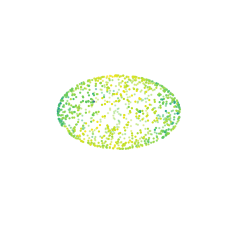

In [4]:
num_eval = int(len(ellipsoid)/5)
# Visualize the point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid[:num_eval, 0], ellipsoid[:num_eval, 1], ellipsoid[:num_eval, 2], s=1.5, c = c)
#ax.set_title("Curvature on torus point cloud")
ax.view_init(0, 0)
#plt.colorbar(scatter)
plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_torus.png', dpi = 300)

In [6]:
def ellipsoid_ground_truth(point_cloud, a, b, c):
    #point_cloud: N by 3 array
    cur = []
    for p in point_cloud:
        k = 1 / (a **2 * b**2 * c**2 * (p[0]**2 / a**4 + p[1]**2 / b**4 + p[2]**2 / c**4) **2)
        cur.append(k)
    return cur

In [6]:
dd= np.array(ellipsoid_ground_truth(ellipsoid, 0.9, 1.5, 0.9))
dd = dd[:1000]

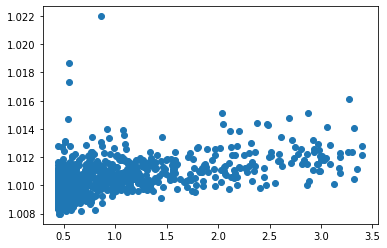

In [7]:
plt.scatter(dd, -c)

In [10]:
non_na_id = ~np.isnan(c)

In [11]:
corr, _ = pearsonr(np.exp(c[non_na_id]), -dd[non_na_id])

In [12]:
corr

0.5350373747317153

In [13]:
corr, _ = pearsonr(c[non_na_id], -dd[non_na_id])

In [14]:
corr

0.5346807163851957

In [2]:
ellipsoid_v1 = np.array(pd.read_csv('ellipsoid_9-15-9.csv', sep=',', header=None))
cur1_v1 = np.array(pd.read_csv('ellipsoid_9159_cur_1.csv', sep=',', header=None))
cur2_v1 = np.array(pd.read_csv('ellipsoid_9159_cur_2.csv', sep=',', header=None))
cur3_v1 = np.array(pd.read_csv('ellipsoid_9159_cur_3.csv', sep=',', header=None))
cur4_v1 = np.array(pd.read_csv('ellipsoid_9159_cur_4.csv', sep=',', header=None))
cur5_v1 = np.array(pd.read_csv('ellipsoid_9159_cur_5.csv', sep=',', header=None))

In [3]:
c = np.vstack([cur1_v1, cur2_v1, cur3_v1, cur4_v1, cur5_v1]).squeeze()

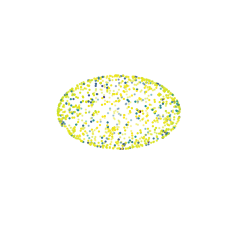

In [7]:
num_eval = int(len(ellipsoid_v1)/5)
# Visualize the point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid_v1[:num_eval, 0], ellipsoid_v1[:num_eval, 1], ellipsoid_v1[:num_eval, 2], s=1.5, c = c)
#ax.set_title("Curvature on torus point cloud")
ax.view_init(0, 0)
#plt.colorbar(scatter)
plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_torus.png', dpi = 300)

In [8]:
dd= np.array(ellipsoid_ground_truth(ellipsoid_v1, 0.9, 1.3, 0.9))
dd = dd[:1000]

In [9]:
cc = np.exp(np.log(-c)* 100)

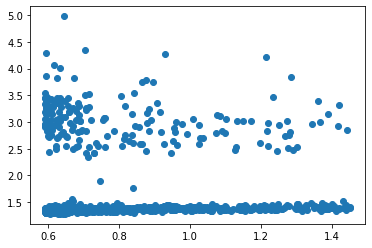

In [10]:
plt.scatter(dd, cc)

In [11]:
non_na_id = ~np.isnan(cc)
corr, _ = pearsonr(np.exp(c[non_na_id]), -dd[non_na_id])
corr

-0.007300792954458879